Q.2 

Using Scara manipulator for the questions

Initial point A=[0.4,0.06,0.1]

Final Point B=[0.4,0.01,0.1]

In [99]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [100]:
def scara_invkin(x,y,z,d1,d2):
    # using formulae from the textbook
    r = (x**2+y**2-d1**2-d2**2)/(2*d1*d2)
    theta2 = np.arctan2((1-r**2)**(0.5),r)
    theta1 = np.arctan2(y,x) - np.arctan2((d2*np.sin(theta2)),(d1+d2*np.cos(theta2)))
    d3 = 0.25-z
    # converting from radians to degrees
    return theta1,theta2,d3

In [101]:
def forward_scara(angles,l):
  x=l*np.cos(angles[0])+l*np.cos(angles[0]+angles[1])
  y=l*np.sin(angles[0])+l*np.sin(angles[0]+angles[1])
  z=l-angles[2] #here angles[2] is d3 from inverse

  return x,y,z

In [102]:
A=[0.4,0.06,0.1]
B=[0.4,0.01,0.1]

took length of the links 0.25

In [103]:
def trajectory(tf):
 to=0
 M=np.matrix([[1,to,to**2,to**3],[0,1,2*to,3*(to**2)],[1,tf,tf**2,tf**3],[0,1,2*tf,3*(tf**2),]])

 I=scara_invkin(0.4,0.06,0.1,0.25,0.25)
 F=scara_invkin(0.4,0.01,0.1,0.25,0.25) 

 Q1=np.matrix([I[0],0,F[0],0]).T
 Q2=np.matrix([I[1],0,F[1],0]).T
 D=np.matrix([I[2],0,F[2],0]).T

 a1=np.matmul(np.linalg.inv(M),Q1)
 a2=np.matmul(np.linalg.inv(M),Q2)
 a3=np.matmul(np.linalg.inv(M),D)

 return a1,a2,a3

In [104]:
to=0
tf=1
Trajectory=trajectory(1)
Trajectory

(matrix([[-0.47954266],
         [ 0.        ],
         [-0.41564081],
         [ 0.27709388]]), matrix([[ 1.25686521],
         [ 0.        ],
         [ 0.08791071],
         [-0.05860714]]), matrix([[0.15],
         [0.  ],
         [0.  ],
         [0.  ]]))

Plotting

In [105]:
P=[]
V=[]
A=[]
T=[]

P1=[]
V1=[]
A1=[]
T1=[]
while(to<tf):
  P1.append(Trajectory[0][0,0]+Trajectory[0][1,0]*to+Trajectory[0][2,0]*(to**2)+Trajectory[0][3,0]*(to**3))
  V1.append(Trajectory[0][1,0]+2*Trajectory[0][2,0]*to+3*Trajectory[0][3,0]*(to**2))
  A1.append(2*Trajectory[0][2,0]+6*Trajectory[0][3,0]*to)
  T1.append(to)
  to+=0.01
to=0

P.append(P1)
V.append(V1)
A.append(A1)
T.append(T1)

P2=[]
V2=[]
A2=[]
T2=[]
while(to<tf):
  P2.append(Trajectory[1][0,0]+Trajectory[1][1,0]*to+Trajectory[1][2,0]*(to**2)+Trajectory[1][3,0]*(to**3))
  V2.append(Trajectory[1][1,0]+2*Trajectory[1][2,0]*to+3*Trajectory[1][3,0]*(to**2))
  A2.append(2*Trajectory[1][2,0]+6*Trajectory[1][3,0]*to)
  T2.append(to)
  to+=0.01
to=0

P.append(P2)
V.append(V2)
A.append(A2)
T.append(T2)

P3=[]
V3=[]
A3=[]
T3=[]
while(to<tf):
  P3.append(Trajectory[2][0,0]+Trajectory[2][1,0]*to+Trajectory[2][2,0]*(to**2)+Trajectory[2][3,0]*(to**3))
  V3.append(Trajectory[2][1,0]+2*Trajectory[2][2,0]*to+3*Trajectory[2][3,0]*(to**2))
  A3.append(2*Trajectory[2][2,0]+6*Trajectory[2][3,0]*to)
  T3.append(to)
  to+=0.01
to=0

P.append(P3)
V.append(V3)
A.append(A3)
T.append(T3)

In [106]:
string=["Position","Velocity","Acceleration"]

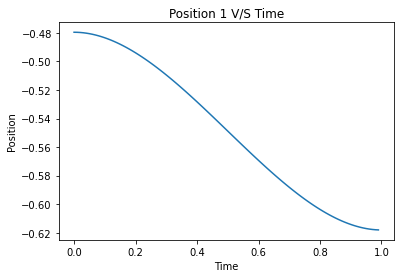

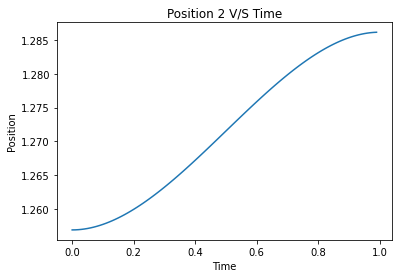

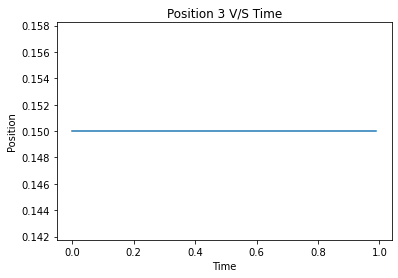

In [107]:
for i in range(3):
  plt.plot(T[i],P[i])
  plt.title("Position "f"{i+1} V/S Time")
  plt.xlabel("Time")
  plt.ylabel(f"{string[0]}")
  plt.show()

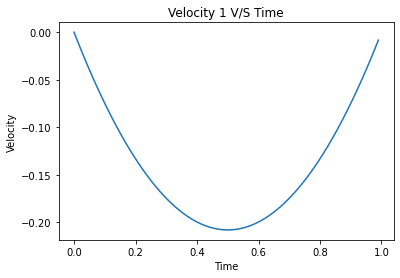

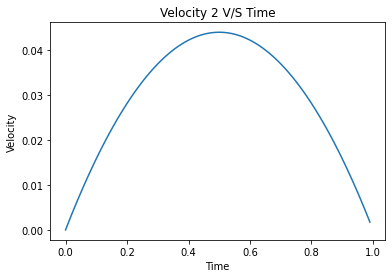

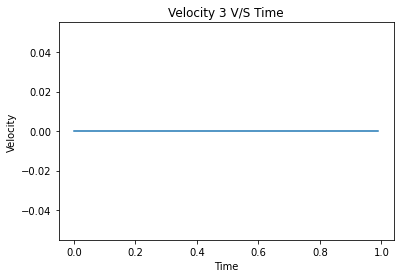

In [108]:
for i in range(3):
  plt.plot(T[i],V[i])
  plt.title("Velocity "f"{i+1} V/S Time")
  plt.xlabel("Time")
  plt.ylabel(f"{string[1]}")
  plt.show()

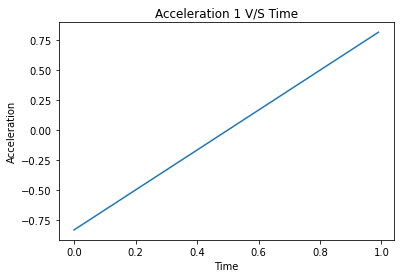

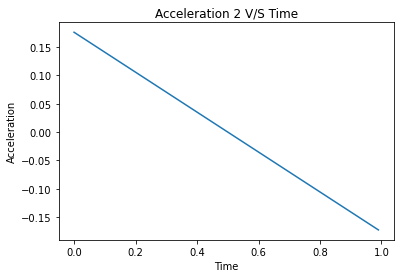

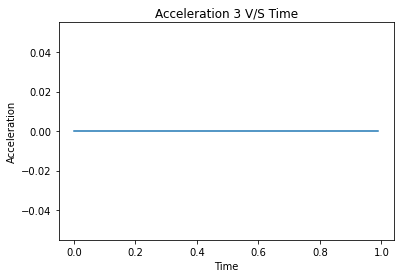

In [109]:
for i in range(3):
  plt.plot(T[i],A[i])
  plt.title("Acceleration "f"{i+1} V/S Time")
  plt.xlabel("Time")
  plt.ylabel(f"{string[2]}")
  plt.show()